CONECTION WITH IB

In [1]:
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=1)

<IB connected to 127.0.0.1:7497 clientId=1>

IMPORTINGS

In [2]:
import pandas as pd
import numpy as np
import talib as tal
import matplotlib.pyplot as plt
from pylab import rcParams

CONTRATO

In [3]:
contract = Forex("EURUSD")

HISTORICAL DATA WITH REALTIME UPDATES

In [4]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='1 D',
        barSizeSetting='1 min',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=1,
        keepUpToDate=True)


In [5]:
data_df = util.df(bars)
data_df.tail()

,date,open,high,low,close,volume,average,barCount
1294,2019-08-22 13:49:00,1.108685,1.108715,1.108675,1.108715,0,0.0,0
1295,2019-08-22 13:50:00,1.108715,1.108715,1.108615,1.108665,0,0.0,0
1296,2019-08-22 13:51:00,1.108665,1.108665,1.108615,1.108615,0,0.0,0
1297,2019-08-22 13:52:00,1.108615,1.108645,1.108550,1.108615,0,0.0,0
1298,2019-08-22 13:53:00,1.108615,1.108620,1.108570,1.108585,0,0.0,0


CANDLESTICK CHART

In [6]:
#Axis x for organize
#rcParams['figure.figsize'] = 12, 20 (Could be useful for size)


In [7]:
chart = data_df[["date", "open", "high", "low","close"]]

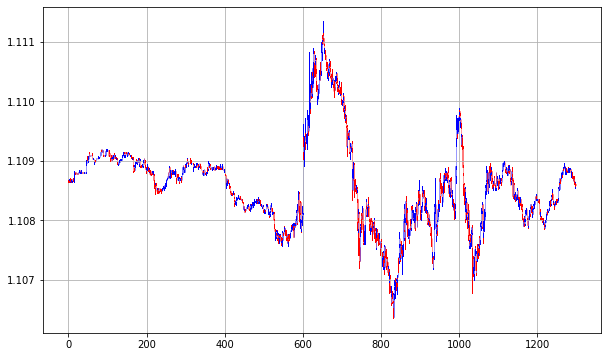

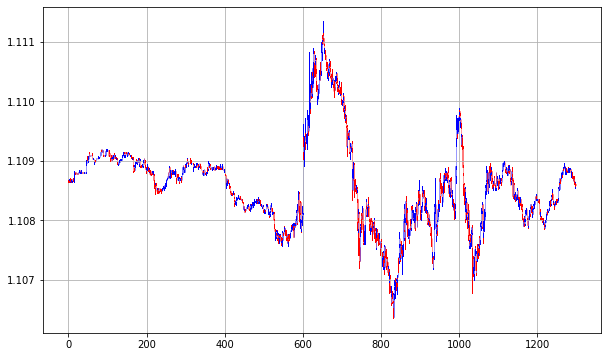

In [8]:
util.barplot(chart)

LINE CHART

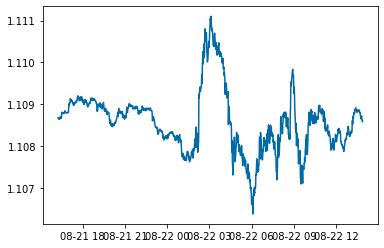

In [30]:
plt.plot(data_df.date, data_df.close, label='EURUSD')
plt.style.use("tableau-colorblind10")

TICK BY TICK DATA FOR ENTRY THE ORDER (BID/ASK)

In [10]:
ticker = ib.reqTickByTickData(contract, 'BidAsk')
print(ticker)

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'), ticks=[], tickByTicks=[], domBids=[], domAsks=[], domTicks=[])


MACD OPTION 1

In [32]:
x = 1
data_df[]

TypeError: incompatible type for a datetime/timedelta operation [add]

In [11]:
macd_fast = 12
macd_slow = 26
macd_signal = 9

In [12]:
close_price = data_df.close

In [13]:
close_price = data_df.close.astype(float)

In [14]:
close_price_df = pd.DataFrame(close_price)
close_price_df

,close
0,1.108675
1,1.108655
2,1.108680
3,1.108655
4,1.108660
5,1.108650
6,1.108645
7,1.108655
8,1.108695
9,1.108690


In [29]:
macd = tal.MACD(close_price, fastperiod=macd_fast, slowperiod=macd_slow, signalperiod=macd_signal)
macd

(0            NaN
 1            NaN
 2            NaN
 3            NaN
 4            NaN
 5            NaN
 6            NaN
 7            NaN
 8            NaN
 9            NaN
 10           NaN
 11           NaN
 12           NaN
 13           NaN
 14           NaN
 15           NaN
 16           NaN
 17           NaN
 18           NaN
 19           NaN
 20           NaN
 21           NaN
 22           NaN
 23           NaN
 24           NaN
 25           NaN
 26           NaN
 27           NaN
 28           NaN
 29           NaN
           ...   
 1269    0.000148
 1270    0.000143
 1271    0.000136
 1272    0.000130
 1273    0.000121
 1274    0.000113
 1275    0.000104
 1276    0.000099
 1277    0.000092
 1278    0.000088
 1279    0.000082
 1280    0.000076
 1281    0.000071
 1282    0.000068
 1283    0.000065
 1284    0.000062
 1285    0.000054
 1286    0.000047
 1287    0.000042
 1288    0.000034
 1289    0.000026
 1290    0.000016
 1291    0.000004
 1292   -0.000001
 1293   -0

In [16]:
#Convert tupla to data frame (neccesary to aply macd.plot)
macd_df = pd.DataFrame(macd)
macd_df

,0,1,2,3,4,5,6,7,8,9,...,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000026,0.000016,0.000004,-0.000001,-0.000008,-0.000010,-0.000016,-0.000024,-0.000030,-0.000037
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000051,0.000044,0.000036,0.000028,0.000021,0.000015,0.000009,0.000002,-0.000004,-0.000011
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000025,-0.000028,-0.000032,-0.000030,-0.000029,-0.000025,-0.000025,-0.000026,-0.000026,-0.000026


In [17]:
#macd_df.plot(color='b', label='Macd', figsize=(12,6))

In [18]:
#short_ema = tal.EMA(np.array(close_price,dtype='f8'),timeperiod=10)

In [19]:
close_price

0       1.108675
1       1.108655
2       1.108680
3       1.108655
4       1.108660
5       1.108650
6       1.108645
7       1.108655
8       1.108695
9       1.108690
10      1.108690
11      1.108685
12      1.108660
13      1.108685
14      1.108710
15      1.108810
16      1.108780
17      1.108805
18      1.108790
19      1.108780
20      1.108790
21      1.108780
22      1.108790
23      1.108785
24      1.108780
25      1.108810
26      1.108815
27      1.108800
28      1.108805
29      1.108845
          ...   
1269    1.108915
1270    1.108875
1271    1.108850
1272    1.108855
1273    1.108825
1274    1.108835
1275    1.108810
1276    1.108855
1277    1.108835
1278    1.108865
1279    1.108835
1280    1.108835
1281    1.108845
1282    1.108855
1283    1.108865
1284    1.108865
1285    1.108805
1286    1.108805
1287    1.108810
1288    1.108775
1289    1.108745
1290    1.108715
1291    1.108655
1292    1.108715
1293    1.108685
1294    1.108715
1295    1.108665
1296    1.1086

MACD OPTION 2

In [20]:
ema_fast = close_price.ewm(span=12, adjust=False).mean()

In [21]:
ema_slow = close_price.ewm(span=26, adjust=False).mean()

In [22]:
macd = ema_fast-ema_slow
macd

0       0.000000e+00
1      -1.595442e-06
2      -8.329478e-07
3      -2.220362e-06
4      -2.883204e-06
5      -4.167388e-06
6      -5.524884e-06
7      -5.727767e-06
8      -2.630564e-06
9      -5.728629e-07
10      1.045824e-06
11      1.903248e-06
12      5.590275e-07
13      1.493794e-06
14      4.203440e-06
15      1.425569e-05
16      1.957576e-05
17      2.551512e-05
18      2.868112e-05
19      3.003703e-05
20      3.155477e-05
21      3.158657e-05
22      3.204924e-05
23      3.164763e-05
24      3.057347e-05
25      3.177663e-05
26      3.275602e-05
27      3.195347e-05
28      3.135942e-05
29      3.372750e-05
            ...     
1269    1.478297e-04
1270    1.434715e-04
1271    1.364276e-04
1272    1.297530e-04
1273    1.206518e-04
1274    1.129440e-04
1275    1.036237e-04
1276    9.873035e-05
1277    9.217593e-05
1278    8.838343e-05
1279    8.201172e-05
1280    7.608503e-05
1281    7.137227e-05
1282    6.766430e-05
1283    6.478581e-05
1284    6.179228e-05
1285    5.395

In [23]:
macd_df = pd.DataFrame(macd)

In [24]:
signal_line = macd_df.ewm(span=9, adjust=False).mean()


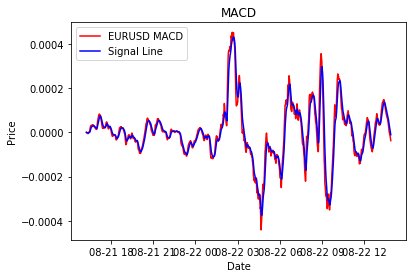

In [25]:
plt.plot(data_df.date, macd, label='EURUSD MACD', color = 'r')
plt.plot(data_df.date, signal_line, label='Signal Line', color='b')
plt.legend(loc=0)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("MACD")
plt.show()
plt.style.use("tableau-colorblind10")

DIVERGENCE MACD #1 Divergencia de Kullback-Leibler

In [26]:
from scipy import stats

In [27]:
close = [1.110150, 1.110135, 1.110155, 1.110170, 1.110175]
mak = [0.000000e+00, 1.196581e-06, -5.249957e-07, 1.203739e-06]

In [28]:
stats.entropy(pk = [close], qk = [mak])

/home/mostoro/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2621: RuntimeWarning: invalid value encountered in true_divide
  qk = 1.0*qk / np.sum(qk, axis=0)


ValueError: operands could not be broadcast together with shapes (1,5) (1,4) 

In [ ]:
stats.entropy(pk = [1100, 1.242], qk = [1200, 6.433])

In [ ]:
stats.entropy(pk = [close_price], qk = [macd])

In [ ]:
stats.entropy(pk = [100000,2.5,300000,400000,500000], qk = [0.1,0.2,0.3,0.4,0.5])

DIVERGENCE MACD #2 ROLLING

Close > rolling.max debe ser verdadero (rompió máximo)
Macd < rolling.max debe ser verdadero (no rompió máximo)

Short trade

Close < rolling.min debe ser verdadero (rompió mínimo)
Macd > rolling.min debe ser verdadero (no rompió mínimo)

Long trade

In [ ]:
close_price_df

In [ ]:
close_max = close_price_df.rolling(window=10).max()
close_max

In [ ]:
close_min = close_price_df.rolling(window=10).min()
close_min

In [ ]:
plt.plot(close_max)
plt.plot(close_min)



In [ ]:
macd_max = macd_df.rolling(window=10).max()
macd_max

In [ ]:
macd_min = macd_df.rolling(window=10).min()
macd_min

In [ ]:
plt.plot(macd_max)
plt.plot(macd_min)


DIVERGENCE MACD #3 

import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


values1 = [1.346112,1.337432,1.246655]
values2 = [1.033836,1.082015,1.117323]

print KL(values1, values2)

In [ ]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


values1 = [1.346112,1.337432,1.246655]
values2 = [1.033836,1.082015,1.117323]

print KL(values1, values2)

In [ ]:
DIVERGENCE MACD #4 LÍNEA AL CHART